<a href="https://colab.research.google.com/github/sdinesh01/news-deserts-visualization/blob/main/BarPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from plotly import *
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import io
import PIL

## Data import 2

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/data-KVnb0.csv')
data['Total Deal Volume ($)'] = data['Total Deal Volume ($)'].str.replace(',','').astype(int)
data

### data import

In [ ]:
from xlrd.book import sheet
# for graph on 
pub_data_20 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2020 Newspapers')
pub_data_20['year'] = '2020'

In [ ]:
pub_data_20.head(7)

,state,newspaper_id,newspaper_name,frequency,city,county,owner_id,owner_name,owner_type,total_circulation,days_published,year
0,AK,50003,Anchorage Press,W,Anchorage,Anchorage Municipality,5813.0,Wick Communications,Private,20000.0,1,2020
1,AK,18776,The Bristol Bay Times/Dutch Harbor Fisherman,W,Anchorage,Anchorage Municipality,6028.0,Ryan Binkley & Jason Evans,Private,NaN,1,2020
2,AK,18654,The Arctic Sounder,W,Anchorage,Anchorage Municipality,6028.0,Ryan Binkley & Jason Evans,Private,2000.0,1,2020
3,AK,10092,Anchorage Daily News,D,Anchorage,Anchorage Municipality,6028.0,Ryan Binkley & Jason Evans,Private,33301.0,7,2020
4,AK,18943,The Cordova Times,W,Cordova,Valdez-Cordova,6045.0,Native Village of Eyak,Private,969.0,1,2020
5,AK,19009,Delta Wind,W,Delta Junction,Southeast Fairbanks Census Area,5504.0,TriDelta Inc,Private,NaN,1,2020
6,AK,90670,Alaska Star,W,Eagle River,Anchorage Municipality,4018.0,Morris Communications Company,Private,4800.0,Thur,2020


In [ ]:
pub_data_16 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2016 Newspapers')
pub_data_14 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2014 Newspapers')
pub_data_04 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA340/assignments/Final/UNCNewspaperDatabase_12_17_20.xlsx', sheet_name='UNC 2004 Newspapers')

In [ ]:
pub_data_16['year'] = '2016'
pub_data_14['year'] = '2014'
pub_data_04['year'] = '2004'

In [ ]:
full_data = pd.concat([pub_data_20,pub_data_16,pub_data_14,pub_data_04])
full_data['year'].value_counts()

2004    8930
2014    7933
2016    7854
2020    6736
Name: year, dtype: int64

### frequency plot 2022

In [ ]:
data.Year = data.Year.astype(int)
data = data.sort_values(by='Year', ascending=True)
data

,Year,Total Number of Deals,Number of Daily Papers Sold,Total Deal Volume ($)
0,2017,31,80,347970000
1,2018,36,45,857420000
2,2019,30,154,1330000000
3,2020,19,81,460000000
4,2021,21,42,678000000


In [ ]:
colors=['#00332f','#07415b','#234787','#4e48a8','#8148b8']
colors.reverse()

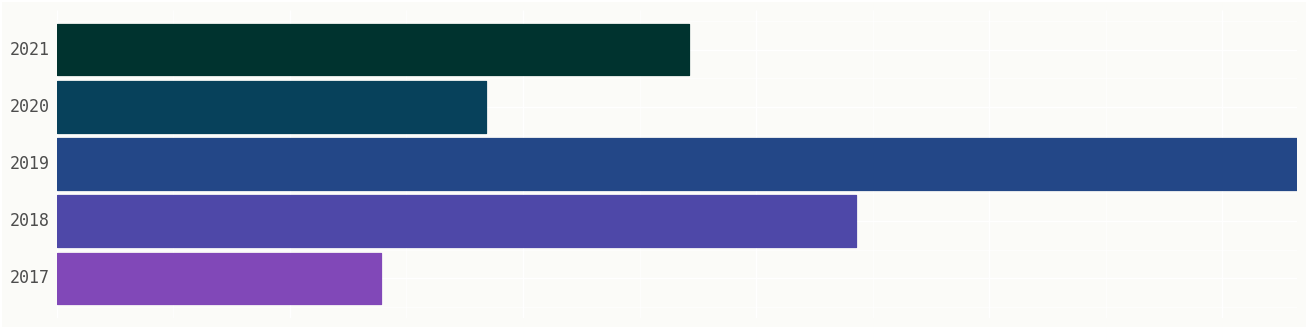

<ggplot: (8743197876161)>

In [ ]:
p = ggplot(data = data, 
           mapping = aes(x='Year',y='Total Deal Volume ($)',fill='Year'))
(p + geom_col(color=colors, fill=colors)  +\
    coord_flip() +\
    scale_y_continuous(expand=(0,0)) +\
    theme(figure_size=(16, 4), plot_background=element_rect(fill='#FBFBf8'),panel_background=element_blank(),axis_ticks_major=element_blank(), 
          axis_title_y=element_blank(), axis_title_x=element_blank(),axis_text_x=element_blank(),
          axis_text_y=element_text(family='monospace', size=12)
          )
   )